## Importing  important library

In [1]:
import os
import pickle
import numpy as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.ticker as mtick

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import RocCurveDisplay

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
tf.random.set_seed(7)

## Importing Data

In [2]:
data = pd.read_csv ('data_groundnut.csv')
print(data)
len(data)

     Temperature  Rainfall  Humidity  pH  Contamination
0             24        37        37   3              0
1             23        31        31   7              0
2             25        37        37   5              0
3             25        44        33   5              0
4             25        40        30   3              1
..           ...       ...       ...  ..            ...
235           23       103        85   5              1
236           24        98        84   7              1
237           21        92        83   4              1
238           24       108        82   4              1
239           21       101        88   5              1

[240 rows x 5 columns]


240

## Visualizing data

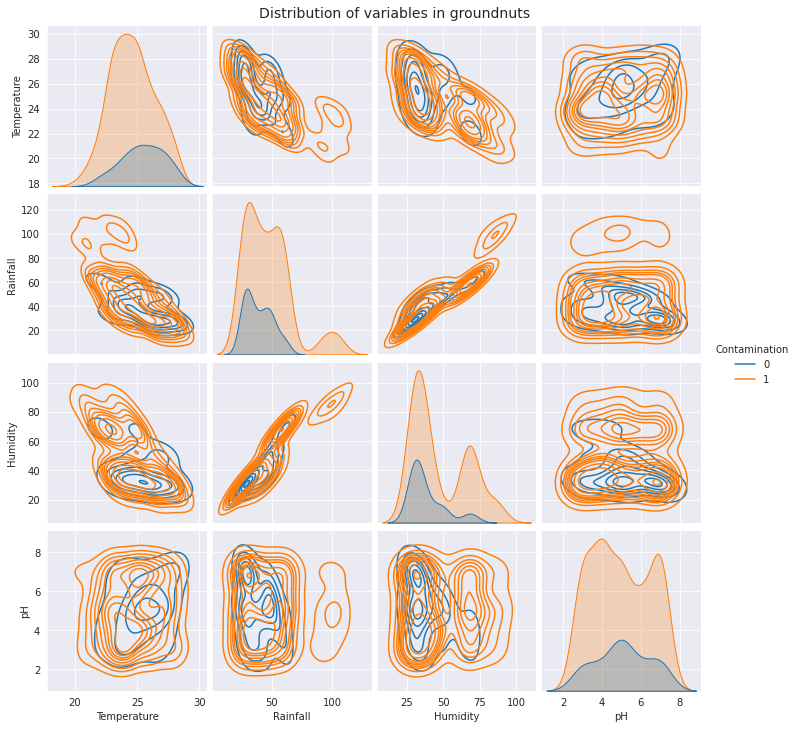

In [3]:
#style must be one of white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid");
g=sns.pairplot(data, hue="Contamination",kind="kde");
g.fig.suptitle("Distribution of variables in groundnuts",fontsize=14,y=1.01)
g.savefig('Prediction_1.PNG')

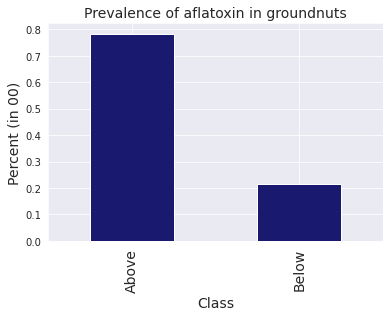

In [4]:
data['Contamination'].value_counts(normalize=True).plot(kind='bar',color="midnightblue")
plt.xticks([0, 1], ['Above','Below'],fontsize=14)  # Set text labels and properties.
plt.ylabel('Percent (in 00)',fontsize=14)
plt.xlabel('Class',fontsize=14)
plt.title("Prevalence of aflatoxin in groundnuts", fontsize=14)
plt.savefig('Prediction_2.PNG',bbox_inches='tight')

## Splitting data to get training and testing data

In [5]:
train, test = train_test_split(data, test_size=0.20, random_state=1)
X_trainn=train[["Temperature","Rainfall", "Humidity","pH"]]
y_train=train[["Contamination"]]
X_testt=test[["Temperature","Rainfall", "Humidity","pH"]]
y_test=test[["Contamination"]]

## Standardizing data

We standardize data using StandardScaler() so that all data range from 0 to 1.

In [6]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
scaler.fit(X_trainn)
X_train=scaler.transform(X_trainn)

scaler.fit(X_testt)
X_test=scaler.transform(X_testt)

## Building GPC model

In [7]:
model_2 = GaussianProcessClassifier(n_restarts_optimizer=10)

Fit the model

In [8]:
model_2.fit(X_train, y_train)
y_pred1= model_2.predict(X_train)

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Making Prediction

In [9]:
y_pred= model_2.predict(X_test)

## Visulazing prediction results

Scatter plot

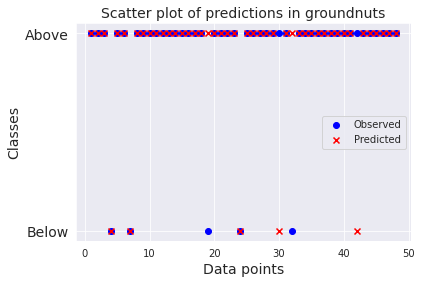

In [10]:
# Plot posteriors
n=np.size(y_test)
points=np.arange(1,n+1)
plt.figure()
plt.scatter(points,y_test, c="b", marker ="o", label="Observed")
plt.scatter(points,y_pred, c="r", marker ="x", label="Predicted")
#plt.title('Groundnuts model scatter plot')
plt.xlabel("Data points",fontsize=14)
plt.ylabel("Classes",fontsize=14)
plt.legend(loc="best")
plt.title("Scatter plot of predictions in groundnuts", fontsize=14)
plt.yticks([0, 1], ['Below', 'Above'],fontsize=14)  # Set text labels and properties.
plt.savefig('Prediction_3.PNG',bbox_inches='tight')

Confusion Matrix

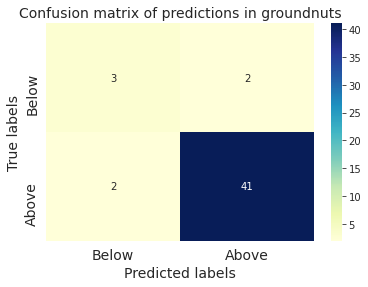

In [11]:

# providing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# If True, write the data value in each cell
ax=sns.heatmap(cm,annot=True,cmap="YlGnBu")

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=14);
ax.set_ylabel('True labels',fontsize=14);
#ax.set_title('Confusion matrix for groundnuts model'); 
ax.xaxis.set_ticklabels(['Below', 'Above'],fontsize=14); 
ax.yaxis.set_ticklabels(['Below', 'Above'],fontsize=14);
plt.title("Confusion matrix of predictions in groundnuts", fontsize=14)
# saving confusion matrix in png form
plt.savefig('Prediction_4.PNG',bbox_inches='tight')

## Calculating performance measures

Printing the accuracy

In [12]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.916667
Precision: 0.953488
Recall: 0.953488
F1 score: 0.953488


In [13]:
# predict probabilities
probs = model_2.predict_proba(X_test)
probs=probs[:, 1]

# ROC Curves

In [14]:
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

AUC: 0.628


In [15]:
# calculate roc curve for baseline
b_probs = [0 for _ in range(len(y_test))]
# calculate roc curve
b_fpr, b_tpr, thresholds = roc_curve(y_test, b_probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)

In [16]:
auc=round(auc,2)

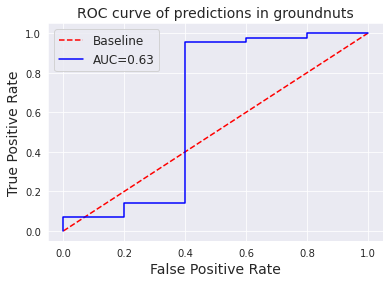

In [17]:

# plot the roc curve for the model
plt.plot(b_fpr, b_tpr, linestyle='--', label='Baseline', color="red")
plt.plot(fpr, tpr, label="AUC="+str(auc),color="blue")
#plt.title('Groundnuts model ROC curve')
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.legend(loc="best",fontsize=12)
plt.title("ROC curve of predictions in groundnuts", fontsize=14)
plt.savefig('Prediction_5.PNG',bbox_inches='tight')

In [25]:
# predict probabilities
y_prob = model_2.predict_proba(X_test)

# keep probabilities for the positive outcome only
y_prob = y_prob[:, 1]

# predict class values
y_pred = model_2.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_prob)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
lr_auc=0.91;
#pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill',color="red")
pyplot.plot(lr_recall, lr_precision, marker='.', label='AUC='+str(lr_auc),color="blue")
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
plt.savefig('Prediction_6.PNG', bbox_inches='tight')

TypeError: 'numpy.float64' object is not callable

In [26]:
# Save the model as serialized object pickle
with open('model_2.pkl', 'wb') as file:
    pickle.dump(model_2, file)

## Permutation feature importance

In [51]:
imps = permutation_importance(model_2, X_train, y_train)
imps.importances_mean

array([0.03541667, 0.02395833, 0.0125    , 0.00833333])

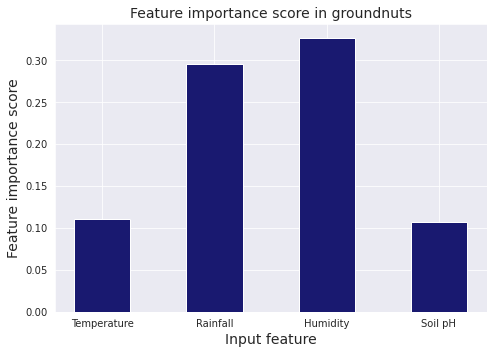

In [50]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
feature = ['Temperature', 'Rainfall', 'Humidity', 'Soil pH']
x=[0.11041667, 0.29583333, 0.32708333, 0.10729167]
ax.bar(feature,x, width=0.5,color="midnightblue")
#plt.title('Groungnuts Model Permutation Importances')
plt.xlabel("Input feature",fontsize=14)
plt.ylabel("Feature importance score",fontsize=14)
plt.title("Feature importance score in groundnuts", fontsize=14)
plt.savefig('Prediction_7.PNG', bbox_inches='tight')

## Building LSTM model

We standardize data using MinMaxScaler() so that all data range from 0 to 1.

In [29]:
scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler.fit(X_trainn)
X_train=scaler.transform(X_trainn)

scaler.fit(X_testt)
X_test=scaler.transform(X_testt)

## Fitting the LSTM model

In [30]:
top_words=240
max_review_length=4
# create the model
embedding_vecor_length = 32
model = Sequential()
#model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
#model.add(Dropout(0.5))
#model.add(LSTM(100))
#model.add(Dropout(0.5))
#model.add(Dense(1, activation='sigmoid'))

model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Bidirectional(LSTM(100, dropout=0.9, recurrent_dropout=0.9)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 32)             7680      
                                                                 
 bidirectional (Bidirectiona  (None, 200)              106400    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 114,281
Trainable params: 114,281
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
3/3 [==============================] - 6s 340ms/step - loss: 0.6849 - accuracy: 0.6979 - val_loss: 0.6641 - val_accuracy: 0.8958
Epoch 2/100
3/3 [==============================] - 0s 35ms/step - loss: 0.6660 - accuracy: 0.7552 - va

Epoch 53/100
3/3 [==============================] - 0s 33ms/step - loss: 0.5528 - accuracy: 0.7552 - val_loss: 0.4037 - val_accuracy: 0.8958
Epoch 54/100
3/3 [==============================] - 0s 31ms/step - loss: 0.5596 - accuracy: 0.7552 - val_loss: 0.4038 - val_accuracy: 0.8958
Epoch 55/100
3/3 [==============================] - 0s 36ms/step - loss: 0.5652 - accuracy: 0.7552 - val_loss: 0.4035 - val_accuracy: 0.8958
Epoch 56/100
3/3 [==============================] - 0s 30ms/step - loss: 0.5685 - accuracy: 0.7552 - val_loss: 0.4048 - val_accuracy: 0.8958
Epoch 57/100
3/3 [==============================] - 0s 30ms/step - loss: 0.5626 - accuracy: 0.7552 - val_loss: 0.4050 - val_accuracy: 0.8958
Epoch 58/100
3/3 [==============================] - 0s 29ms/step - loss: 0.5677 - accuracy: 0.7552 - val_loss: 0.4060 - val_accuracy: 0.8958
Epoch 59/100
3/3 [==============================] - 0s 30ms/step - loss: 0.5630 - accuracy: 0.7552 - val_loss: 0.4081 - val_accuracy: 0.8958
Epoch 60/100


## Making Prediction

In [31]:
y_pred = model.predict(X_test)
y_pred=np.round(y_pred)


2/2 [==============================] - 0s 4ms/step


## Visualizing Prediction Results

Scatter plot

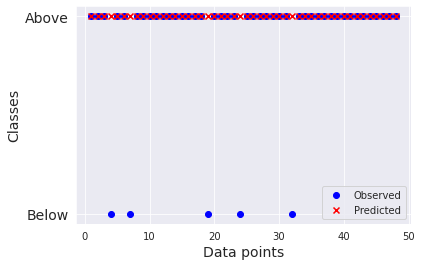

In [32]:
sns.set_style("darkgrid");
# Plot posteriors
n=np.size(y_test)
points=np.arange(1,n+1)
plt.figure()
plt.scatter(points,y_test, c="b", marker ="o", label="Observed")
plt.scatter(points,y_pred, c="r", marker ="x", label="Predicted")
#plt.title('Groundnuts model scatter plot')
plt.xlabel("Data points",fontsize=14)
plt.ylabel("Classes",fontsize=14)
plt.legend(loc="best")
plt.yticks([0, 1], ['Below', 'Above'],fontsize=14)  # Set text labels and properties.
plt.savefig('Prediction_8.PNG',bbox_inches='tight')

Confusion Matrix

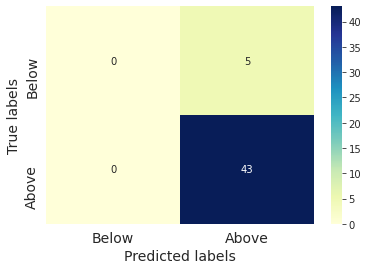

In [33]:
sns.set_style("darkgrid");
# providing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# If True, write the data value in each cell
ax=sns.heatmap(cm,annot=True,cmap="YlGnBu")

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=14);
ax.set_ylabel('True labels',fontsize=14); 
#ax.set_title('Confusion matrix for groundnuts model'); 
ax.xaxis.set_ticklabels(['Below', 'Above'],fontsize=14);
ax.yaxis.set_ticklabels(['Below', 'Above'],fontsize=14);

# saving confusion matrix in png form
plt.savefig('Prediction_9.PNG',bbox_inches='tight')

## Calculating prformance of the model

Printing the accuracy

In [34]:
y_pred=np.round(y_pred)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.895833
Precision: 0.895833
Recall: 1.000000
F1 score: 0.945055


## Accuracy and Loss curve

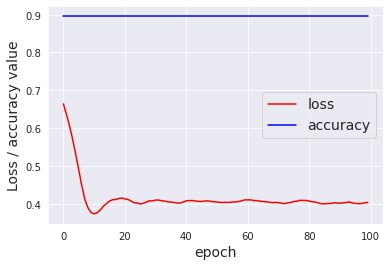

In [35]:
plt.plot(history.history['val_loss'], color="red")
plt.plot(history.history['val_accuracy'], color="blue")
#plt.title('Model loss vs accuracy')
plt.xlabel('epoch',fontsize=14)
plt.ylabel('Loss / accuracy value',fontsize=14)
plt.legend(['loss', 'accuracy'], loc='best',fontsize=14)
plt.savefig('Prediction_10.PNG',bbox_inches='tight')